In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("dark")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Models
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from utils import learning_curve_plotter, model_param_curve, metrics

In [5]:
# base param
seed = 712

In [49]:
# Load Dataset

diabet_path = "./data/diabetes.csv"
df_diabet = pd.read_csv(diabet_path)

# EDA

In [40]:
df_diabet.head()
df_diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
len(df_diabet)

768

Outcome
0          500
1          268
dtype: int64


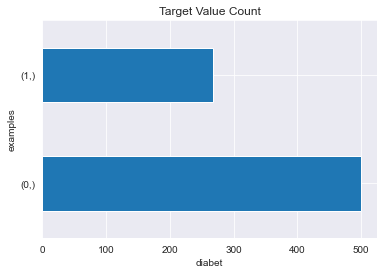

In [42]:
# visualize target value

target_cnt = df_diabet[["Outcome"]].value_counts()
print(target_cnt)

target_cnt.plot(kind='barh', title="Target Value Count")
plt.xlabel("diabet")
plt.ylabel("examples")
plt.grid()
plt.show()

In [43]:
target_cnt / len(df_diabet)

Outcome
0          0.651042
1          0.348958
dtype: float64

In [45]:
df_diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df_diabet.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [46]:
target = 'Outcome'
features = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

train_df, test_df = train_test_split(df_diabet, test_size=0.2, random_state=712)
X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# # data normalize 진행
# sc = StandardScaler()
# sc.fit(X_train_origin)

# X_train = sc.transform(X_train_origin)
# X_test = sc.transform(X_test_origin)

# for i in range(X_train.shape[1]):
#     print(f"Range after normalize feature {i}'s {min(X_train_origin[:, i])} ~ {max(X_train_origin[:, i])} to {min(X_train[:, i])} ~ {max(X_train[:, i])}")

# Decision Tree

- pruning 반드시 포함 - dept에 대한 조정 필요
- information gain (ID3, GINI)등을 사용할 필요는 없지만, 설명해야함
- DT의 dept에 따라 복잡도 명시

In [48]:
# Tree Pre-Pruning 작업 진행
# tree.export_text(tree_clf)
tree_clf = tree.DecisionTreeClassifier(random_state=seed)

params = {
    'max_depth': [2,4,8,16,32,64,128],
    'criterion': ['gini', 'entropy']
}

"""
that macro weighs each class equally whereas micro weights each sample equally. If the distribution of classes is symmetrical (i.e. you have an equal number of samples for each class), then macro and micro will result in the same score.
https://datascience.stackexchange.com/questions/45974/micro-f1-and-macro-f1-are-equal-in-binary-classification-and-i-dont-know-why
"""

tree_grid_search = GridSearchCV(estimator=tree_clf, param_grid=params,
                                return_train_score=True,
                           verbose=3, n_jobs=-1)
tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=712), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, 64, 128]},
             return_train_score=True, verbose=3)

[CV 2/5] END criterion=gini, max_depth=4;, score=(train=0.813, test=0.805) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8;, score=(train=0.937, test=0.746) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=64;, score=(train=1.000, test=0.634) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=128;, score=(train=1.000, test=0.740) total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4;, score=(train=0.801, test=0.779) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=16;, score=(train=1.000, test=0.724) total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=64;, score=(train=1.000, test=0.650) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8;, score=(train=0.947, test=0.724) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=32;, score=(train=1.000, test=0.740) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=128;, score=(train=1.000, test=0.764) total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4

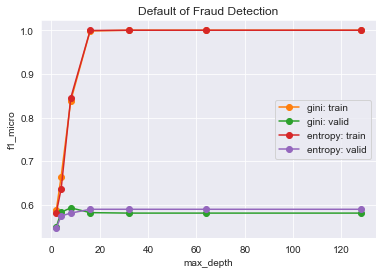

In [34]:
# grid_search.best_score_

tree_grid_search.cv_results_.keys()
tree_grid_search_result_df = pd.DataFrame(tree_grid_search.cv_results_)
tree_grid_search_result_df.sort_values(by="rank_test_score")

gini_df = tree_grid_search_result_df[tree_grid_search_result_df['param_criterion'].str.contains('gini')]
entropy_df = tree_grid_search_result_df[tree_grid_search_result_df['param_criterion'].str.contains('entropy')]

x_range=params['max_depth']
x_label="max_depth"
y_label="f1_micro"
title="Default of Fraud Detection"

gini_mean_train = gini_df["mean_train_score"]
gini_std_train = gini_df["std_train_score"]

gini_mean_test = gini_df["mean_test_score"]
gini_std_test = gini_df["std_test_score"]

entropy_mean_train = entropy_df["mean_train_score"]
entropy_std_train = gini_df["std_train_score"]

entropy_mean_test = entropy_df["mean_test_score"]
entropy_std_test = gini_df["std_test_score"]

plt.grid()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.plot(x_range, gini_mean_train, marker='o', label='gini: train', color=f"C{1}")
plt.plot(x_range, gini_mean_test, marker='o', label='gini: valid', color=f"C{2}")

plt.plot(x_range, entropy_mean_train, marker='o', label='entropy: train', color=f"C{3}")
plt.plot(x_range, entropy_mean_test, marker='o', label='entropy: valid', color=f"C{4}")

plt.legend()
plt.show()

In [35]:
# search for the best param
best_params = tree_grid_search_result_df["params"][np.argmax(tree_grid_search_result_df['mean_test_score'])]
best_score = np.max(tree_grid_search_result_df['mean_test_score'])

print(best_params, best_score)

{'criterion': 'gini', 'max_depth': 8} 0.5929862487239537


In [36]:
# best parameter tester
best_tree_clf = tree.DecisionTreeClassifier(
    max_depth=8,
    random_state=seed,
    criterion='gini'
)

best_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=712)

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/user/anacond

/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/Users/user/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_cl

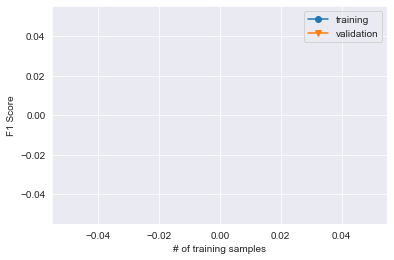

[CV 5/5] END criterion=gini, max_depth=128;, score=(train=1.000, test=0.582) total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2;, score=(train=0.583, test=0.552) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.577, test=0.541) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=32;, score=(train=1.000, test=0.628) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=128;, score=(train=1.000, test=0.582) total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2;, score=(train=0.583, test=0.552) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=16;, score=(train=1.000, test=0.568) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=64;, score=(train=1.000, test=0.623) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=64;, score=(train=1.000, test=0.623) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8;, score=(train=0.851, test=0.628) total time=   0.0s
[CV 3/5] END criterion=entropy, max_d

[CV 3/5] END criterion=entropy, max_depth=32;, score=(train=1.000, test=0.568) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.606, test=0.546) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=16;, score=(train=0.997, test=0.623) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=64;, score=(train=1.000, test=0.628) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=64;, score=(train=1.000, test=0.601) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8;, score=(train=0.871, test=0.579) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8;, score=(train=0.865, test=0.546) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=128;, score=(train=1.000, test=0.623) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=64;, score=(train=1.000, test=0.628) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=64;, score=(train=1.000, test=0.601) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8

In [37]:
# Learning Curve Analysis

learning_curve_plotter(best_tree_clf, X_train, y_train)

In [38]:
# Test Set Performance

metrics(X_train, y_train, X_test, y_test, best_tree_clf)

ValueError: multi_class must be in ('ovo', 'ovr')

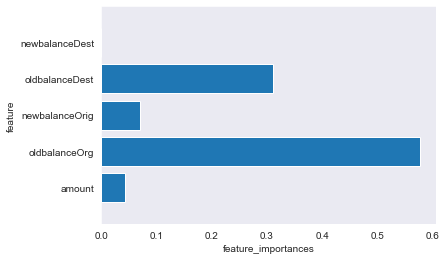

In [28]:
# feature importance

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features),
            model.feature_importances_,
            align='center')
    plt.yticks(np.arange(n_features),
              features)
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.show()
    
plot_feature_importances(best_tree_clf)

# feature별 importance 매핑
# for name, value in zip(features , best_tree_clf.feature_importances_):
#     print('{} : {:.3f}'.format(name, value))
    
# feature importance를 column 별로 시각화 하기
# sns.barplot(x=best_tree_clf.feature_importances_ , y=y_train)

## Neural Network

- actvation function & nn layer의 다양성 분석
- Learning rate와 momentum을 조정하여 NN의 학습을 빠르게할 수있음 (trade-off)는 있음
- Regularization은 overfitting을 방지 할 수 있음

In [157]:
nn_params = {
    "learning_rate_init": [0.1, 0.3, 0.5, 0.7, 1],
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2],
    "hidden_layer_sizes": [2, 5, 10, 30, 50, 100],
    "max_iter": [1, 5, 10, 20, 30, 40, 50]
}

nn_clf = MLPClassifier(random_state=seed)
nn_clf.fit(X_train, y_train)

nn_grid_search = GridSearchCV(estimator=nn_clf, param_grid=nn_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
nn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2616 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3224 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3896 tasks      | elapsed:  7.3min
/Users/user/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory 

GridSearchCV(estimator=MLPClassifier(random_state=712), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [2, 5, 10, 30, 50, 100],
                         'learning_rate_init': [0.1, 0.3, 0.5, 0.7, 1],
                         'max_iter': [1, 5, 10, 20, 30, 40, 50]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [161]:
nn_grid_search.cv_results_.keys()
nn_grid_search_df = pd.DataFrame(nn_grid_search.cv_results_)
nn_grid_search_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
741,2.766041,0.647430,0.008631,0.001377,0.01,30,0.1,50,"{'alpha': 0.01, 'hidden_layer_sizes': 30, 'lea...",0.780000,...,0.779667,0.000212,1,0.779896,0.779740,0.779635,0.779635,0.779740,0.779729,0.000095
567,0.111709,0.025281,0.012688,0.006707,0.001,50,0.3,1,"{'alpha': 0.001, 'hidden_layer_sizes': 50, 'le...",0.779583,...,0.779667,0.000167,2,0.779635,0.779583,0.779531,0.779687,0.779583,0.779604,0.000053
161,0.122511,0.016738,0.012399,0.002747,0.00001,50,0.7,1,"{'alpha': 1e-05, 'hidden_layer_sizes': 50, 'le...",0.779583,...,0.779625,0.000083,3,0.779583,0.779635,0.779583,0.779687,0.779583,0.779615,0.000042
575,0.483037,0.024381,0.010009,0.000955,0.001,50,0.5,5,"{'alpha': 0.001, 'hidden_layer_sizes': 50, 'le...",0.779583,...,0.779625,0.000083,3,0.779635,0.779635,0.779583,0.779687,0.779635,0.779635,0.000033
576,0.945892,0.042874,0.011910,0.002787,0.001,50,0.5,10,"{'alpha': 0.001, 'hidden_layer_sizes': 50, 'le...",0.779583,...,0.779625,0.000083,3,0.779635,0.779635,0.779583,0.779687,0.779635,0.779635,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.142627,0.005481,0.016103,0.003766,0.001,100,0.1,1,"{'alpha': 0.001, 'hidden_layer_sizes': 100, 'l...",0.779583,...,0.732958,0.070466,836,0.779687,0.725208,0.779479,0.604583,0.779583,0.733708,0.067910
105,0.075181,0.002149,0.006804,0.000863,0.00001,30,0.1,1,"{'alpha': 1e-05, 'hidden_layer_sizes': 30, 'le...",0.779167,...,0.716458,0.080685,837,0.778646,0.779479,0.572135,0.666615,0.775312,0.714438,0.083181
385,0.151647,0.007550,0.014348,0.003385,0.0001,100,0.1,1,"{'alpha': 0.0001, 'hidden_layer_sizes': 100, '...",0.772292,...,0.703500,0.087725,838,0.770521,0.779583,0.666406,0.751354,0.558490,0.705271,0.083617
805,0.128447,0.011756,0.012959,0.001427,0.01,100,0.1,1,"{'alpha': 0.01, 'hidden_layer_sizes': 100, 'le...",0.705833,...,0.675958,0.172646,839,0.709115,0.338177,0.779635,0.779323,0.779427,0.677135,0.171655


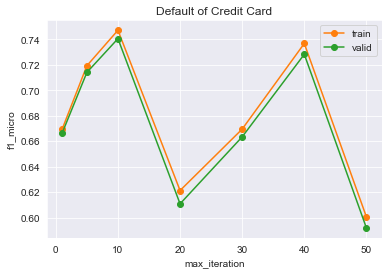

In [156]:
# draw hyperparam tunning

# model_param_curve(nn_grid_search_df, "hidden layer size", nn_params, "hidden_layer_sizes", "nn_hidden.png")
# model_param_curve(nn_grid_search_df, "learning_rate_init", nn_params, "learning_rate_init", "nn_lr.png")
# model_param_curve(nn_grid_search_df, "L2 penalty(alpha)", nn_params, "alpha", "nn_l2.png")
# model_param_curve(nn_grid_search_df, "max_iteration", nn_params, "max_iter", "nn_max_iter.png")

In [162]:
# search for the best param
best_params = nn_grid_search_df["params"][np.argmax(nn_grid_search_df['mean_test_score'])]
best_score = np.max(nn_grid_search_df['mean_test_score'])

print(best_params, best_score)

{'alpha': 0.01, 'hidden_layer_sizes': 30, 'learning_rate_init': 0.1, 'max_iter': 50} 0.7796666666666667


In [163]:
# # best parameter tester
best_nn_clf = MLPClassifier(
    random_state=seed,
    alpha=0.01,
    hidden_layer_sizes=30,
    learning_rate_init=0.1,
    max_iter=50
)

best_nn_clf.fit(X_train, y_train)

/Users/user/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=30, learning_rate_init=0.1,
              max_iter=50, random_state=712)

/Users/user/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/user/anaconda3/lib/python3.8/site-package

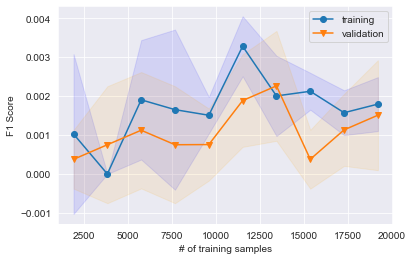

In [165]:
# Learning Curve Analysis

learning_curve_plotter(best_nn_clf, X_train, y_train)

In [164]:
score(X_train, y_train, X_test, y_test, nn_clf)
metrics(y_test, nn_clf.predict(X_test))

score - train: 0.7835416666666667, test: 0.777
test metrics - roc: 0.5454816544077504, f1: 0.20167064439140808


## Boosting
- bias와 varience의 영향을 가장 적게 받을 것임

In [ ]:
boosting_params = {
    "n_estimators":[1, 2, 3, 5, 10, 20, 30, 50, 100]
}

ada_clf = AdaBoostClassifier(random_state=seed)

ada_grid_search = GridSearchCV(estimator=ada_clf, param_grid=boosting_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
ada_grid_search.cv_results_.keys()
ada_grid_search_result_df = pd.DataFrame(ada_grid_search.cv_results_)
ada_grid_search_result_df.sort_values(by="rank_test_score")

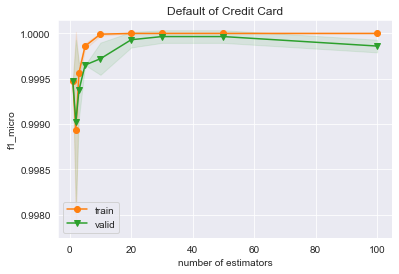

In [62]:
# draw hyperparam tunning

model_param_curve(ada_grid_search_result_df, "number of estimators", boosting_params, "n_estimators", "boost_estimators.png")

In [33]:
best_params = ada_grid_search_result_df["params"][np.argmax(ada_grid_search_result_df['mean_test_score'])]
best_score = np.max(ada_grid_search_result_df['mean_test_score'])

print(best_params)

# param_list = [i for i in ada_grid_search_result_df.keys() if i.startswith("param_")]
# new_df = pd.DataFrame(ada_grid_search_result_df, columns=[i for i in ada_grid_search_result_df.keys() if i != 'params'])
# new_df2 = new_df.set_index(param_list)
# new_df3 = new_df2.drop(axis=1, labels=[i for i in new_d
# f2.columns if i.startswith("split")])

{'n_estimators': 20}


In [34]:
# # best parameter tester

best_ada_clf = AdaBoostClassifier(
    random_state=seed,
    n_estimators=1
)

best_ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1, random_state=712)

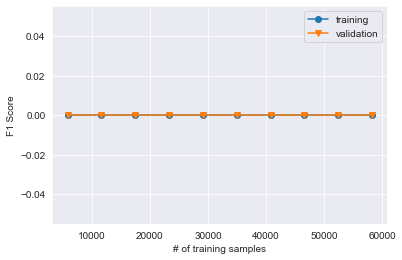

In [35]:
# Learning Curve Analysis

learning_curve_plotter(best_ada_clf, X_train, y_train)

In [36]:
score(X_train, y_train, X_test, y_test, best_ada_clf)
metrics(y_test, best_ada_clf.predict(X_test))

NameError: name 'score' is not defined

In [26]:
# grad_clf = GradientBoostingClassifier(
#     learning_rate=0.1,
#     n_estimators=1000,
#     max_depth = 3, # no more than 5 usually
#     max_features=0.6,
#     subsample=0.7,
#     random_state=seed
# )
# grad_clf.fit(X_train, y_train)

# score(X_train, y_train, X_test, y_test, grad_clf)
# metrics(y_test, grad_clf.predict(X_test))

GradientBoostingClassifier(max_features=0.6, n_estimators=1000,
                           random_state=712, subsample=0.7)

## SVM

In [14]:
# svm_params = {
#     "kernel":["linear", "poly", "rbf"],
#     "C": [0.1,1,100,1000]
# }

svm_clf = svm.SVC(random_state=seed)

# svm_grid_search = GridSearchCV(estimator=svm_clf, param_grid=svm_params,
#                            scoring='f1_micro', return_train_score=True,
#                            verbose=3, n_jobs=-1)
# svm_grid_search.fit(X_train, y_train)

svm_clf.fit(X_train, y_train)

SVC(random_state=712)

In [2]:
svm_grid_search.cv_results_.keys()
svm_grid_search_df = pd.DataFrame(svm_grid_search.cv_results_)
svm_grid_search_df.sort_values(by="rank_test_score")

NameError: name 'svm_grid_search' is not defined

In [ ]:
linear_df = svm_grid_search_df[svm_grid_search_df['param_criterion'].str.contains('linear')]
poly_df = svm_grid_search_df[svm_grid_search_df['param_criterion'].str.contains('poly')]
rbf_df = svm_grid_search_df[svm_grid_search_df['param_criterion'].str.contains('rbf')]

In [ ]:
def model_param_curve_multi(grid_search_result_df, x_label, params, param_name, save_fig_name):
    
    x_label=x_label
    y_label="f1_micro"
    title="Default of Credit Card"
    
    mean_train = grid_search_result_df["mean_train_score"]
    mean_test = grid_search_result_df["mean_test_score"]

    #Plotting
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.plot(x_range, mean_train, marker='o', label='train', color=f"C{1}")
    plt.plot(x_range, mean_test, marker='o', label='valid', color=f"C{2}")
    plt.plot(x_range, mean_train, marker='v', label='train', color=f"C{3}")
    plt.plot(x_range, mean_test, marker='v', label='valid', color=f"C{4}")
    plt.plot(x_range, mean_train, marker='s', label='train', color=f"C{5}")
    plt.plot(x_range, mean_test, marker='s', label='valid', color=f"C{6}")
    
    plt.legend()
    plt.savefig(save_fig_name)
    plt.show()

In [ ]:
# draw hyperparam tunning

model_param_curve(linear_df, "number of estimators", boosting_params, "n_estimators", "boost_estimators.png")

# model_param_curve(svm_grid_search_df, "number of estimators", boosting_params, "n_estimators", "boost_estimators.png")

In [ ]:
best_params = svm_grid_search_df["params"][np.argmax(svm_grid_search_df['mean_test_score'])]
best_score = np.max(svm_grid_search_df['mean_test_score'])

print(best_params)

In [ ]:
# # best parameter tester

best_svm_clf = svm.SVC(
    random_state=seed
)

best_svm_clf.fit(X_train, y_train)

In [ ]:
# Learning Curve Analysis

learning_curve_plotter(best_svm_clf, X_train, y_train)

In [ ]:
score(X_train, y_train, X_test, y_test, best_svm_clf)
metrics(y_test, best_svm_clf.predict(X_test))

## K-NN

In [19]:
knn_params = {
    "n_neighbors": [1, 2, 3, 5, 10, 30, 50]
}

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_params,
                           scoring='f1_micro', return_train_score=True,
                           verbose=3, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:   11.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   17.0s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 5, 10, 30, 50]},
             return_train_score=True, scoring='f1_micro', verbose=3)

In [20]:
# https://idkim97.github.io/machine%20learning/MachineLearning_SVM/
knn_grid_search.cv_results_.keys()
knn_grid_search_df = pd.DataFrame(knn_grid_search.cv_results_)
knn_grid_search_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.061842,0.005783,1.404975,0.056454,30,{'n_neighbors': 30},0.776875,0.781042,0.777292,0.778542,...,0.779333,0.002306,1,0.786927,0.785469,0.785677,0.785990,0.784583,0.785729,0.000760
6,0.063882,0.006949,1.529227,0.083897,50,{'n_neighbors': 50},0.778333,0.781875,0.777083,0.778958,...,0.779250,0.001617,2,0.784010,0.782708,0.783229,0.783854,0.783490,0.783458,0.000464
4,0.060511,0.001374,1.095401,0.066606,10,{'n_neighbors': 10},0.772917,0.778958,0.775417,0.776875,...,0.775708,0.002077,3,0.796562,0.795469,0.796406,0.796562,0.794010,0.795802,0.000984
1,0.066819,0.001307,0.780910,0.028016,2,{'n_neighbors': 2},0.765833,0.761458,0.768125,0.762292,...,0.764917,0.002601,4,0.844427,0.844687,0.844271,0.842760,0.844115,0.844052,0.000673
3,0.058988,0.007784,0.926585,0.036443,5,{'n_neighbors': 5},0.749792,0.756875,0.753542,0.752708,...,0.754333,0.003158,5,0.817240,0.815885,0.817708,0.819115,0.816146,0.817219,0.001163
2,0.064785,0.004296,0.840317,0.035695,3,{'n_neighbors': 3},0.732708,0.734792,0.742500,0.736875,...,0.736500,0.003292,6,0.847135,0.845625,0.841875,0.842187,0.843802,0.844125,0.002012
0,0.035845,0.006311,0.673325,0.030895,1,{'n_neighbors': 1},0.702917,0.694583,0.697708,0.696042,...,0.697792,0.002816,7,0.999583,0.999271,0.999375,0.999687,0.999375,0.999458,0.000153


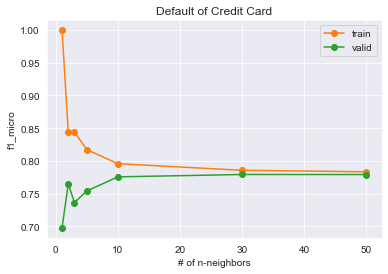

In [21]:
# draw hyperparam tunning
model_param_curve(knn_grid_search_df, "# of n-neighbors", knn_params, "n_neighbors", "knn_n_neighbors.png")

In [22]:
# params
best_params = knn_grid_search_df["params"][np.argmax(knn_grid_search_df['mean_test_score'])]
best_score = np.max(knn_grid_search_df['mean_test_score'])
print(best_params)

{'n_neighbors': 30}


In [23]:
# best parameter tester

best_knn_clf = KNeighborsClassifier(
    n_neighbors=30
)

best_knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

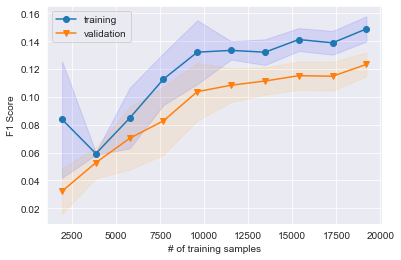

In [24]:
# Learning Curve Analysis

learning_curve_plotter(best_knn_clf, X_train, y_train)

In [25]:
score(X_train, y_train, X_test, y_test, best_knn_clf)
metrics(y_test, best_knn_clf.predict(X_test))

score - train: 0.7860833333333334, test: 0.7788333333333334
test metrics - roc: 0.5276528011820664, f1: 0.12754766600920447
